### Problem 1

a) Code the Conjugate Gradient Method and apply it to solve a simple $$Hx=b$$ system, with H’s dimension as 10×10.

In [2]:
# r_k = Hx - b
import numpy as np

epsilon_threshhold = 0.001

def conjugate_gradient(H,b,initial_point = np.array([[3],[1]])):

    x_k = initial_point
    r_k = np.matmul(H,initial_point) - b
    p_k = -r_k

    while np.linalg.norm(r_k) > epsilon_threshhold:
        
        a_k_num = -np.matmul(r_k.T,p_k)
        a_k_denom = np.matmul(p_k.T,np.matmul(H,p_k))
        a_k = a_k_num / a_k_denom


        x_k = x_k + a_k*p_k
        r_k = np.matmul(H,x_k) - b

        b_k_num = np.matmul(p_k.T,np.matmul(H,r_k))
        b_k_denom = np.matmul(p_k.T,np.matmul(H,p_k))

        b_k = b_k_num / b_k_denom

        p_k = -r_k + b_k*p_k


    print(x_k)



#H = np.array([[8,-2],[-2,2]])
#initial_point = np.array([[3],[1]])
#b = np.array([[1],[1]])


'''H = np.array([[ 2.5409,-0.0113],
  [-0.0113,0.5287]])
b = np.array([[1.3864], [0.3719]])
initial_point  = np.array([[-3],[-4]])
'''

H = np.array([[4,1],[1,3]])
b = np.array([[1],[2]])
initial_point = np.array([[2],[1]])
conjugate_gradient(H,b,initial_point)


[[0.09090909]
 [0.63636364]]


b) Construct  matrices  with  various  eigenvalue  distributions  (clustered  and  non-clustered)and apply the above CG method to them.  Comment on the behaviour of the CG method in terms of convergence.

### Question 2

 Your start-up will face the cash requirements shown in Table 1 in the next eight quarters(positive entries represent cash needs while negative entries represent cash surpluses).The company has three borrowing possibilities.

|   Q1	|   Q2	|  Q3 	|   Q4	|   Q5	| Q6  | Q7 | Q8 |  
|---	|---	|---	|---	|---	|---  |--- |--- |
|   100	|   500	|  100 	|  -600 	|  -500 	|  200  | 600   | -900   |

- a 2-year loan available at the beginning of Q1, with a 1% interest per quarter.
- The other two borrowing opportunities are available at the beginning of every quarter: a 6-monthloan with a 1.8% interest per quarter, and a quarterly loan with a 2.5% interest for the quarter.

a)  Write a program that implements the revised simplex algorithm.


In [1]:
import numpy as np
def revised_simplex_method(A,b,c,b_vars,nb_vars):

    final_ans = np.zeros((len(b_vars)+len(nb_vars),))
    iterations = 0
    while True:
        
        print("Basic Variables bef =" + str(b_vars))
        print("Non Basic Variables bef = " + str(nb_vars))

        B = A[:,b_vars]
        N = A[:,nb_vars]
        c_B = c[b_vars,:]
        c_N = c[nb_vars,:]

        print(B.shape)
        print(b.shape)
        x_B = np.linalg.solve(B,b)
        lambda_ = np.linalg.solve(B.T,c_B)
        s_N =c_N - np.matmul(N.T,lambda_)

        print("x_B = " + str(x_B) )
        print("lambda = " + str(lambda_))
        print("s_N = " + str(s_N))

        if np.all(s_N>=0) :
            final_ans[b_vars] = x_B.squeeze(1)
            return True,final_ans

        q = int(np.argmin(s_N,axis=0))
        A_q = np.expand_dims(A[:,nb_vars[q]],axis=1)
        d = np.linalg.solve(B,A_q)

        print("q = " + str(q))
        print("d = " + str(d))

        if np.all(d<=0):
            print("Feasible Region Unbounded")
            return False,np.zeros((len(b_vars)+len(nb_vars),)) 

        x_q = np.inf
        p = -1
        d_positive = d>0
        for i in range(x_B.shape[0]):
            if d_positive[i,0]:
                ratio = x_B[i,0] / d[i,0]
                if ratio > x_q:
                    ratio = x_q
                    p = i
        
        tmp = b_vars[p]
        b_vars[p] = nb_vars[q]
        nb_vars[q] = tmp

        b_vars.sort()
        nb_vars.sort()

        print("Basic Variables = " + str(b_vars))
        print("Non Basic Variables = " + str(nb_vars))
        iterations+=1
        if iterations==10:
            break
        print("---------")



In [2]:
def find_initial_point(A,b,c):
    
    e = np.zeros((A.shape[1]+A.shape[0],1))
    e[A.shape[1]:,:] = 1
    print(e)
    A_new = np.zeros((A.shape[0],A.shape[1]+A.shape[0]))
    A_new[:A.shape[0],:A.shape[1]] = A.copy()

    for i in range(b.shape[0]):
        if b[i,0] < 0:
            A_new[i,A.shape[1]+i] = -1
        else:
            A_new[i,A.shape[1]+i] = 1
    print(A_new)
    
    b_vars = [ i for i in range(A.shape[1],A.shape[1]+A.shape[0]) ]
    nb_vars = [ i for i in range(A.shape[1])]
    flag,solution = revised_simplex_method(A_new,b,e,b_vars,nb_vars)
    return flag,solution
    
    

In [4]:
A = np.array([[1,1,1,0],[2,0.5,0,1]])
b = np.array([[5],[8]])
c = np.array([[-4],[-2],[0],[0]])

'''A = np.array([[10,20,1,0],[8,8,0,1]])
b = np.array([[120],[80]])
c = np.array([[-12],[-16],[0],[0]])
'''
'''A = np.array([[1,1,-1,0,0],[1,-1,0,1,0],[3,1,0,0,1]])
b = np.array([[1],[0],[6]])
c = np.array([[-2],[-1],[0],[0],[0]])'''
'''A = np.array([[2,1,1,0],[1,2,0,1]],dtype=np.float32)
b = np.array([[12],[9]],dtype=np.float32)
c = np.array([[-1],[-1],[0],[0]],dtype=np.float32)'''
'''A = np.array([[-3,2,1,1],[-2,1,1,3]],dtype=np.int64)
b = np.array([[7],[1]],dtype=np.int64)
c = np.array([[1],[1],[-1],[-1]],dtype=np.int64)'''

'''A = np.array([[2,1,1,1],[1,-1,-1,1]])
b = np.array([[2],[-1]])
c = np.array([[3],[1],[1],[0],[0]])'''

'''A = np.array([[1,1,-1,0,0],[2,-1,0,1,0],[0,1,0,0,1]])
b = np.array([[1],[1],[2.0/3]])
c = np.array([[6],[3],[0],[0],[0]])'''

'''flag,point = get_initial_point(A,b,c)
if flag == False:
    print("Could not Find an Initial Feasible Point. No solution for the LPP problem")
else:
    b_vars =[]
    nb_vars = []

    for i in range(point.shape[0]- A.shape[0]):
        if point[i]==True:
            nb_vars.append(i)
        else:
            b_vars.append(i)

    ans = revised_simplex(A,b,c,b_vars,nb_vars)
    print(ans)'''
'''
A = np.array([[1,1,1,-1,0,0],[1,-2,0,0,-1,0],[0,0,1,0,0,-1]])
b = np.array([[1000],[0],[340]])
c = np.array([[10],[15],[25],[0],[0],[0]])'''

'''A = np.array([[4,3,1,0],[2,1,0,1]])
b = np.array([[240],[100]])
c = np.array([[7],[5],[0],[0]])'''
'''
b_vars = [2,3]
nb_vars = [0,1]
'''

flag,initial_solution = find_initial_point(A,b,c)
if (not np.all(np.isclose(initial_solution[A.shape[1]:],np.zeros((A.shape[0],)))))or(not flag):
    print("No Initial Feasible Solution; Solution doesnt exist")
else:
    b_vars = []
    nb_vars = []


    for i in range(A.shape[1]):
        if initial_solution[i] == 0.0:
            nb_vars.append(i)
        else:
            b_vars.append(i)
    print("#############")
    flag,ans = revised_simplex_method(A,b,c,b_vars,nb_vars)
    if flag:
       print(ans) 

#ans = revised_simplex_method(A,b,c,b_vars,nb_vars)
#print(ans)


[[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]]
[[1.  1.  1.  0.  1.  0. ]
 [2.  0.5 0.  1.  0.  1. ]]
Basic Variables bef =[4, 5]
Non Basic Variables bef = [0, 1, 2, 3]
(2, 2)
(2, 1)
x_B = [[5.]
 [8.]]
lambda = [[1.]
 [1.]]
s_N = [[-3. ]
 [-1.5]
 [-1. ]
 [-1. ]]
q = 0
d = [[1.]
 [2.]]
Basic Variables = [0, 4]
Non Basic Variables = [1, 2, 3, 5]
---------
Basic Variables bef =[0, 4]
Non Basic Variables bef = [1, 2, 3, 5]
(2, 2)
(2, 1)
x_B = [[4.]
 [1.]]
lambda = [[ 1. ]
 [-0.5]]
s_N = [[-0.75]
 [-1.  ]
 [ 0.5 ]
 [ 1.5 ]]
q = 1
d = [[0.]
 [1.]]
Basic Variables = [0, 2]
Non Basic Variables = [1, 3, 4, 5]
---------
Basic Variables bef =[0, 2]
Non Basic Variables bef = [1, 3, 4, 5]
(2, 2)
(2, 1)
x_B = [[4.]
 [1.]]
lambda = [[ 0.]
 [-0.]]
s_N = [[0.]
 [0.]
 [1.]
 [1.]]
#############
Basic Variables bef =[0, 2]
Non Basic Variables bef = [1, 3]
(2, 2)
(2, 1)
x_B = [[4.]
 [1.]]
lambda = [[ 0.]
 [-2.]]
s_N = [[-1.]
 [ 2.]]
q = 0
d = [[0.25]
 [0.75]]
Basic Variables = [0, 1]
Non Basic Variables = [2, 3]
---

In [21]:
import numpy as np
def revised_simplex(A,b,c,b_vars,nb_vars):

    # For storing the final result
    final_ans = np.zeros((len(b_vars) + len(nb_vars),))
    while True:

        # Get the Basis Matrix B and NonBasis Matrix N
        B = A[:,b_vars]
        N = A[:,nb_vars]

        # Compute x_B , lambda and s_N
        B_inverse = np.linalg.inv(B)
        x_B = np.matmul(B_inverse,b)
        print(x_B)
        lambda_ = np.matmul(B_inverse.T,c[b_vars,:])
        s_N = c[nb_vars,:] - np.matmul(N.T,lambda_)

        # Check if we have reached a solution
        if (s_N>=0).all():
            for i in range(len(b_vars)):
                final_ans[b_vars[i]] = x_B[i]
            
            return final_ans
        
        qidx = int(np.argmin(s_N,axis=0))
        q = nb_vars[qidx]
    
        d = np.matmul(B_inverse,np.expand_dims(A[:,q],axis=1))

        # Check if feasible region is bounded or not
        if (d<=0).all():
            print("The Feasible Region is Unbounded")
            return np.zeros((len(b_vars) + len(nb_vars),))


        
        xq_plus = float(np.min(x_B/d,axis=0)[0])
        pidx = np.argmin(x_B/d,axis=0)[0]
        p = b_vars[pidx]
        
        # Update the solution vector x
        x_B_plus = x_B - xq_plus*d
        # Compute the solution vector x
        final_ans = np.zeros((len(b_vars) + len(nb_vars),))
        for i in range(len(x_B_plus)):
            final_ans[b_vars[i]] = x_B_plus[i,0]
        final_ans[q] = xq_plus
        #print(final_ans)
        # Swap between p and q 
        tmp = b_vars[pidx]
        b_vars[pidx] = nb_vars[qidx]
        nb_vars[qidx] = tmp

        # Sort the indices of the Basic and Non Basic Variables
        b_vars.sort()
        nb_vars.sort()


b) Solve the above LP using your program and report the final results.

c)   Use  PuLP  and  scipy.optimize.linprog  to  verify  your  answer.   Change  the  optimization algorithm  used  by  the  solver  -  try  interior  point,  revised-simplex  and  dual-simplex.   Comment  on findings.

#### PULP

In [15]:
from pulp import *

model = LpProblem("FurnitureProblem", LpMaximize)

x1 = LpVariable("tables", 0, None, LpInteger)
x2 = LpVariable("chairs", 0, None, LpInteger) 
x3 = LpVariable("bookcases", 0, None, LpInteger)

In [16]:
model += 40 * x1 + 30 * x2 + 45 * x3 
model += 2 * x1 + 1 * x2 + 2.5 * x3 <= 60, "Labour"
model += 0.8 * x1 + 0.6 * x2 + 1.0 * x3 <= 16, "Machine"
model += 30 * x1 + 20 * x2 + 30 * x3 <= 400, "wood"
model += x1 >= 10, "tables"

In [ ]:
# The problem is solved using PuLP's choice of Solver
model.solve()

# Each of the variables is printed with it's resolved optimum value
for v in model.variables():
    print(v.name, "=", v.varValue)

### scipy.optimize

In [74]:
from scipy.optimize import linprog

c = np.array([2,1])
A_ub = np.array([[-1,1],[-1,-1],[1,-2]])
b_ub = np.array([1,-2,4])
bounds = (0,None)
method = 'revised simplex'
ans = linprog(c,A_ub,b_ub,bounds=bounds,method=method)


/var/folders/sm/_xvm618541nc11hb7mv_kpj40000gn/T/ipykernel_26994/3912944025.py:8: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  ans = linprog(c,A_ub,b_ub,bounds=bounds,method=method)


In [75]:
ans

     con: array([], dtype=float64)
     fun: 2.5
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0. , 0. , 6.5])
  status: 0
 success: True
       x: array([0.5, 1.5])

### Question 3

a) Consider the problem

$$
min \text{  } x_{1}^{2}+ 2x_{2}^{2} − 2x_{1}−6x_{2}−2x_{1}x_{2},
$$

such that
$$
x_{1} + x_{2} \le 2
$$
$$
-x_{1} + 2x_{2} \le 2

$$

$$
x_{1},x_{2} >= 0 
$$

Solve geometrically (Plot the geometry and solution points to visualize)

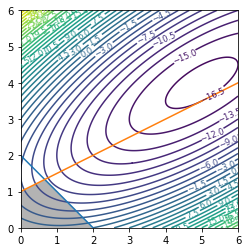

In [27]:
import matplotlib.pyplot as plt
import numpy as np


d = np.linspace(0,6,1000)
x1,x2 = np.meshgrid(d,d)

plt.imshow( (( (x1 + x2) <= 2) & ((-x1 + 2*x2) <= 2) & (x1>=0) & (x2>=0) ).astype(int) , 
                extent=(x1.min(),x2.max(),x2.min(),x2.max()),origin="lower", cmap="Greys", alpha = 0.3)

x1_ = np.linspace(0,6,500)
x2_1 = 2 - x1_ 
x2_2 = (2 + x1_)/2

z = x1**2 + 2*(x2**2) - 2*x1 - 6*x2 - 2*x1*x2 

cs = plt.contour(x1,x2,z,levels=43)
plt.plot(x1_,x2_1, label=r'$x1+x2\leq2$')
plt.plot(x1_,x2_2, label=r'$-x1+2x2\leq2$')
plt.clabel(cs,inline=True, fontsize='smaller')
plt.xlim(0,6)
plt.ylim(0,6)

plt.show()

b) Implement the active set method for quadratic programs (Algo 16.3 in Nocedal and Wright(2006)).

In [167]:

def create_KKT_Matrix(G,A_ne,b_ne,c,active_indices,point):
    
    KKT_matrix = np.zeros((G.shape[0]+len(active_indices),G.shape[1]+len(active_indices)))
    KKT_matrix[:G.shape[0],:G.shape[1]] = G.copy()
    KKT_matrix[:G.shape[0],G.shape[1]:] = A_ne[active_indices].T
    KKT_matrix[G.shape[0]:,:G.shape[1]] = A_ne[active_indices]
    
    rhs = np.zeros((c.shape[0]+b_ne[active_indices].shape[0],1))
    Gx_plus_c = np.matmul(G,point) + c
 
    Ax_minus_b  = np.matmul(A_ne[active_indices],point) - b_ne[active_indices]
    rhs[:c.shape[0],:] = Gx_plus_c
    rhs[c.shape[0]:,:] = Ax_minus_b
    
    return KKT_matrix,rhs

def compute_step_length(p,A_ne,b_ne,active_indices,current_point):
    step_length = 1.0

    for i in range(A_ne.shape[0]):
        if i not in active_indices:
            if (np.all(np.matmul(A_ne[i,:],p) < 0)):
                numerator = b_ne[i,0] - np.matmul(A_ne[i,:],current_point)
                denominator = np.matmul(A_ne[i,:],p)
                #print("Numerator = " + str(numerator))
                #print("Denominator = " + str(denominator))
                step = float(numerator/denominator)
                step_length = min(step,step_length)
    
    return step_length


def active_set_method(G,c,A_ne,b_ne,initial_point):

    #  A_ne , b_ne , H , initial_point

    current_point = initial_point.copy()
    reached_new_point = True
    active_indices = []
    #print(active_indices)
    iterations = 0
    while True:
        if reached_new_point:
            Ax =  np.matmul(A_ne,current_point)
            Ax_diff = (Ax - b_ne).squeeze(1)
            active_indices = np.where(Ax_diff==0)[0].tolist()
        
        mat = create_KKT_Matrix(G,A_ne,b_ne,c,active_indices,current_point)
        sol_vector = np.linalg.solve(mat[0],mat[1])
        
        #print(sol_vector)
        
        p = sol_vector[:G.shape[0],:]
        lambda_ = sol_vector[G.shape[0]:,:]
    
        #print("current_point = " + str(current_point))
        #print("increment = " + str(p))
        #print("lambda = " + str(lambda_))
        
        if ( np.all(np.isclose(p,np.zeros((p.shape[0],p.shape[1]))))):
            
            reached_new_point=False
            if np.all(lambda_>=0):
                return iterations,current_point
            else:
                rm_constraint_idx = int(np.argmin(lambda_,axis=0))
                del active_indices[rm_constraint_idx]
        else:
            alpha = compute_step_length(-p,A_ne,b_ne,active_indices,current_point)  
            #print("Alpha value =" + str(alpha) )
  
            new_point = current_point + alpha*(-p)
            current_point = new_point
            reached_new_point=True
        #print("----------")
        iterations+=1


c) Choose  three  initial  starting  points:  
- one  in  the  interior  of  the  feasible  region
- one  at the vertex 
- one at a non-vertex point on the boundary of the feasible region.

Comment on the convergence properties

In [170]:
G = np.array([[2,-2],[-2,4]])
c = np.array([[-2],[-6]])
A_ne = np.array([[-1,-1],[1,-2]])
b_ne = np.array([[-2],[-2]])
initial_point = np.array([[0.5],[0.5]])

it, sol = active_set_method(G,c,A_ne,b_ne,initial_point)
it

3

d) Use CVXOPT and solve the above QP. What algorithm does CVXOPT use to solve QP? Understand and comment on your findings.

In [19]:
from cvxopt import matrix, solvers

P = matrix([[2.0,-2.0],[-2.0,4.0]])
q = matrix([-2.0,-6.0])
G = matrix([[1.0,1.0],[-1.0,2.0]])
h = matrix([2.0,2.0])

solution = solvers.qp(P,q,G,h)
solution

     pcost       dcost       gap    pres   dres
 0: -8.4082e+00 -1.4514e+00  9e+00  1e+00  8e-01
 1: -4.3448e+00 -5.4301e+00  1e+00  1e-16  6e-16
 2: -4.8946e+00 -4.9082e+00  1e-02  1e-16  0e+00
 3: -4.8999e+00 -4.9001e+00  1e-04  4e-17  2e-16
 4: -4.9000e+00 -4.9000e+00  1e-06  2e-16  2e-16
Optimal solution found.


{'x': <2x1 matrix, tc='d'>,
 'y': <0x1 matrix, tc='d'>,
 's': <2x1 matrix, tc='d'>,
 'z': <2x1 matrix, tc='d'>,
 'status': 'optimal',
 'gap': 1.3530627047054012e-06,
 'relative gap': 2.761352760593931e-07,
 'primal objective': -4.899999464082869,
 'dual objective': -4.900000817145574,
 'primal infeasibility': 2.3551386880256624e-16,
 'dual infeasibility': 1.570092458683775e-16,
 'primal slack': 2.435986776508516e-07,
 'dual slack': 3.8911692089051155e-07,
 'iterations': 4}